# Emotion Detector

Copyright @ 2020 **ABCOM Information Systems Pvt. Ltd.** All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and limitations under the License.

# ===================================================================

Data source (Kaggle) https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential

from IPython.display import Image
import tensorflow as tf
from skimage.color import rgb2lab,gray2rgb,rgb2gray
from skimage.transform import resize

from tqdm import tqdm
from skimage.io import imread, imshow

import IPython.display as display
from PIL import Image

# Downloading data

In [ ]:
!wget http://abcom.com/article/Project.rar

--2020-06-11 09:51:24--  http://abcom.com/article/Project.rar
Resolving abcom.com (abcom.com)... 172.67.220.7, 104.24.102.18, 104.24.103.18, ...
Connecting to abcom.com (abcom.com)|172.67.220.7|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58857117 (56M) [application/rar]
Saving to: ‘Project.rar’

Project.rar         100%[===================>]  56.13M  8.96MB/s    in 6.9s    

2020-06-11 09:51:31 (8.15 MB/s) - ‘Project.rar’ saved [58857117/58857117]



In [ ]:
!unrar x 'Project.rar'

Streaming output truncated to the last 5000 lines.
Extracting  train/sad/Training_6529266.jpg                                85%  OK 
Extracting  train/sad/Training_65329617.jpg                               85%  OK 
Extracting  train/sad/Training_65338712.jpg                               85%  OK 
Extracting  train/sad/Training_65338797.jpg                               85%  OK 
Extracting  train/sad/Training_65387162.jpg                               85%  OK 
Extracting  train/sad/Training_65404494.jpg                               85%  OK 
Extracting  train/sad/Training_65426218.jpg                               85%  OK 
Extracting  train/sad/Training_65430136.jpg                               85%  OK 
Extracting  train/sad/Training_65437377.jpg                               85%  OK 
Extracting  train/sad/Training_6545735.jpg                                85%  OK 
Extracting  train/sad/Trainin

# Exploring the Dataset
### Counting number of images

In [ ]:
img = []
for expression in os.listdir("/content/train/"):
  i=0
  print('\n'+str(len(os.listdir("/content/train/" + expression))) + " " + expression + " images")
  train_ids = next(os.walk("/content/train/" + expression+'/'))[2]
  for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = "/content/train/" + expression+'/' + id_+'' 
    img1 = imread(path)
    #if i<1:
    img.append((img1,expression))
    i=i+1  

  5%|▍         | 145/3171 [00:00<00:02, 1448.94it/s]


3171 surprise images


  5%|▌         | 203/3995 [00:00<00:01, 2026.65it/s]


3995 angry images


  4%|▎         | 172/4830 [00:00<00:02, 1713.89it/s]


4830 sad images


  3%|▎         | 234/7214 [00:00<00:02, 2331.42it/s]


7214 happy images


  6%|▌         | 237/4097 [00:00<00:01, 2361.64it/s]


4097 fear images


100%|██████████| 436/436 [00:00<00:00, 2327.42it/s]



436 disgust images

4965 neutral images


100%|██████████| 4965/4965 [00:02<00:00, 2277.80it/s]


### Printing sample image in each category

Text(0.5, 1.0, 'surprise')

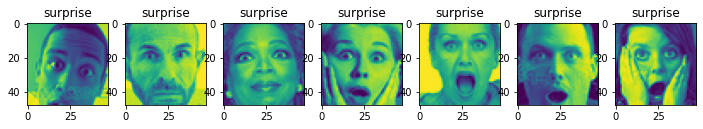

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,7,1)
ax1.set_title(img[0][1])
ax1.imshow(img[0][0])
ax2 = fig.add_subplot(1,7,2)
ax2.imshow(img[1][0])
ax2.set_title(img[1][1])
ax3 = fig.add_subplot(1,7,3)
ax3.imshow(img[2][0])
ax3.set_title(img[2][1])
ax4 = fig.add_subplot(1,7,4)
ax4.imshow(img[3][0])
ax4.set_title(img[3][1])
ax5 = fig.add_subplot(1,7,5)
ax5.imshow(img[4][0])
ax5.set_title(img[4][1])
ax6 = fig.add_subplot(1,7,6)
ax6.imshow(img[5][0])
ax6.set_title(img[5][1])
ax7 = fig.add_subplot(1,7,7)
ax7.imshow(img[6][0])
ax7.set_title(img[6][1])

# Generate Training Batches

In [ ]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("/content/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 28708 images belonging to 7 classes.


# Defining Model

In [ ]:
def createModel():
  model = Sequential()

  model.add(Conv2D(32,(3,3), padding='same', activation='relu',input_shape=(48, 48,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
  model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
  model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512,(3,3), activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(64,activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(64,activation='relu',))
  model.add(Dropout(0.25))

  model.add(Dense(7, activation='softmax'))

  return model

In [ ]:
model = createModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       1

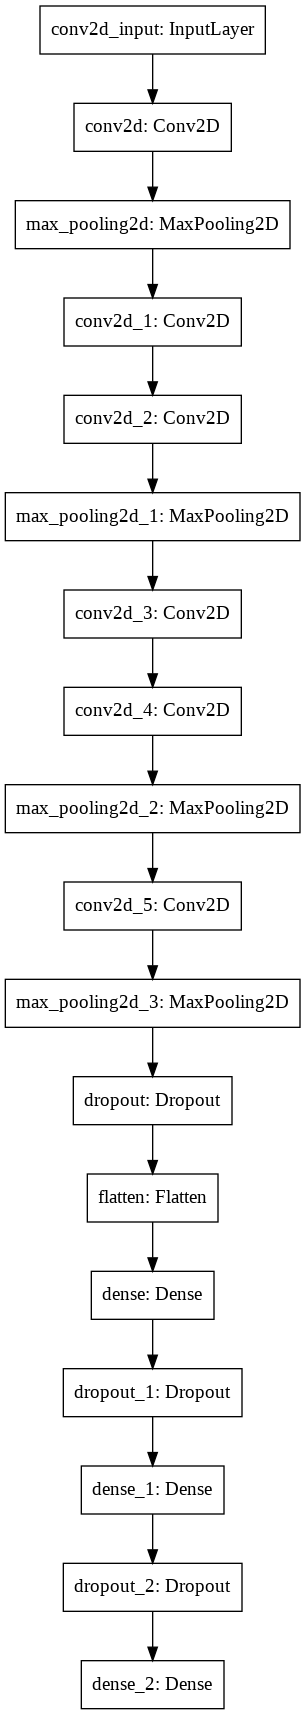

In [ ]:
tf.keras.utils.plot_model(model)

# Model Compiling

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [ ]:
history = model.fit(
    x=train_generator,
    epochs=100,
)

Epoch 1/100
449/449 [==============================] - 27s 60ms/step - loss: 1.8523 - accuracy: 0.2378
Epoch 2/100
449/449 [==============================] - 27s 60ms/step - loss: 1.7981 - accuracy: 0.2577
Epoch 3/100
449/449 [==============================] - 28s 62ms/step - loss: 1.7335 - accuracy: 0.2900
Epoch 4/100
449/449 [==============================] - 27s 61ms/step - loss: 1.6698 - accuracy: 0.3293
Epoch 5/100
449/449 [==============================] - 28s 61ms/step - loss: 1.6337 - accuracy: 0.3431
Epoch 6/100
449/449 [==============================] - 27s 61ms/step - loss: 1.5939 - accuracy: 0.3606
Epoch 7/100
449/449 [==============================] - 28s 62ms/step - loss: 1.5569 - accuracy: 0.3836
Epoch 8/100
449/449 [==============================] - 27s 61ms/step - loss: 1.5255 - accuracy: 0.3989
Epoch 9/100
449/449 [==============================] - 28s 62ms/step - loss: 1.4952 - accuracy: 0.4124
Epoch 10/100
449/449 [==============================] - 27s 60ms/step - l

## Preparing the Testing Batches

Making the Testing test along with the expression for evaluating the results

In [ ]:
test_img = []
test_exp = []
for expression in os.listdir("/content/test/"):
  train_ids = next(os.walk("/content/test/" + expression+'/'))[2]
  for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = "/content/test/" + expression+'/' + id_+'' 
    img = imread(path)
    img = gray2rgb(rgb2gray(img))
    img = rgb2lab(img)[:,:,0] 
    test_img.append(img)
    test_exp.append(expression)

test_img = np.asarray(test_img)
test_exp = np.asarray(test_exp) 
test_img = test_img.reshape(test_img.shape+(1,))

100%|██████████| 1233/1233 [00:02<00:00, 604.33it/s]


# Inference

In [ ]:
y_pred = model.predict(test_img)

## Visualizing the result

In [ ]:
pred_class = []
for i in range (len(y_pred)):
  pr = y_pred[i].argmax()
  pred_class.append(pr)

In [ ]:
emotion = {0:'angry', 1:'disgust', 2:'fear', 3:'happy',
           4:'neutral', 5:'sad', 6:'surprise'}
pred_emo = []           
for i in range(len(pred_class)):
  pred_emo.append(emotion[pred_class[i]]) 

## Real labels

In [ ]:
label = ['angry','disgust','fear','happy','neutral', 'sad','surprise']
test_class = [0,0,0,0,0,0,0]
for i in range (len(test_exp)):
  if test_exp[i]=='angry':
    test_class[0] = test_class[0]+1
  if test_exp[i]=='disgust':
    test_class[1] = test_class[1]+1 
  if test_exp[i]=='fear':
    test_class[2] = test_class[2]+1
  if test_exp[i]=='happy':
    test_class[3] = test_class[3]+1
  if test_exp[i]=='neutral':
    test_class[4] = test_class[4]+1
  if test_exp[i]=='sad':
    test_class[5] = test_class[5]+1
  if test_exp[i]=='surprise':
    test_class[6] = test_class[6]+1 
test_class                        

[958, 111, 1024, 1774, 1233, 1247, 831]

## Predicted Labels

In [ ]:
pred_class = [0,0,0,0,0,0,0]
for i in range (len(pred_emo)):
  if pred_emo[i]=='angry':
    pred_class[0] = pred_class[0]+1
  if pred_emo[i]=='disgust':
    pred_class[1] = pred_class[1]+1 
  if pred_emo[i]=='fear':
    pred_class[2] = pred_class[2]+1
  if pred_emo[i]=='happy':
    pred_class[3] = pred_class[3]+1
  if pred_emo[i]=='neutral':
    pred_class[4] = pred_class[4]+1
  if pred_emo[i]=='sad':
    pred_class[5] = pred_class[5]+1
  if pred_emo[i]=='surprise':
    pred_class[6] = pred_class[6]+1 
pred_class  

[440, 0, 573, 1911, 1902, 2072, 280]

## Bar Plot

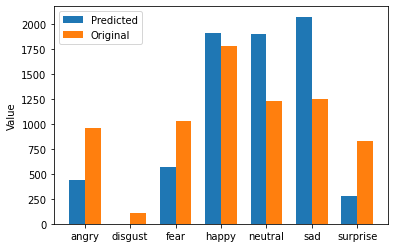

In [ ]:
x = np.arange(len(label))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pred_class, width, label='Predicted')
rects2 = ax.bar(x + width/2, test_class, width, label='Original')
ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()

# Inference on unseen data

In [ ]:
!wget https://raw.githubusercontent.com/abcom-mltutorials/emotionsdetector/master/emotion1.jpg
!wget https://raw.githubusercontent.com/abcom-mltutorials/emotionsdetector/master/emotion2.jpg
!wget https://raw.githubusercontent.com/abcom-mltutorials/emotionsdetector/master/emotion3.jpg
!wget https://raw.githubusercontent.com/abcom-mltutorials/emotionsdetector/master/emotion4.jpg 
!wget https://raw.githubusercontent.com/abcom-mltutorials/emotionsdetector/master/emotion5.jpg


--2020-06-11 10:39:23--  https://raw.githubusercontent.com/abcom-mltutorials/emotionsdetector/master/emotion1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1566 (1.5K) [image/jpeg]
Saving to: ‘emotion1.jpg’

emotion1.jpg        100%[===================>]   1.53K  --.-KB/s    in 0s      

2020-06-11 10:39:24 (24.7 MB/s) - ‘emotion1.jpg’ saved [1566/1566]

--2020-06-11 10:39:39--  https://raw.githubusercontent.com/abcom-mltutorials/emotionsdetector/master/emotion2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23646 (23K) [image/jp

## Predicting

In [ ]:
l=['emotion1.jpg','emotion2.jpg','emotion3.jpg','emotion4.jpg','emotion5.jpg']
exp = []
for i in l:
  img = imread(i)
  img = resize(img, (48, 48), mode='constant', preserve_range=True)
  img = gray2rgb(rgb2gray(img))
  img = rgb2lab(img)[:,:,0]
  img = img.reshape((1,)+img.shape+(1,))
  result = model.predict(img)
  exp.append(emotion[result.argmax()])

## Displaying results

(-0.5, 90.5, 121.5, -0.5)

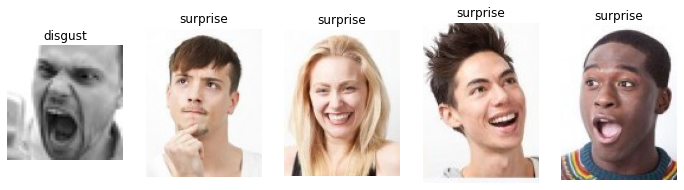

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(1,5,1)
ax1.set_title(exp[0])
im = imread(l[0])
ax1.imshow(im,cmap="gray")
ax1.axis('off')
ax2 = fig.add_subplot(1,5,2)
im = imread(l[1])
ax2.imshow(im)
ax2.set_title(exp[1])
ax2.axis('off')
ax3 = fig.add_subplot(1,5,3)
im = imread(l[2])
ax3.imshow(im)
ax3.set_title(exp[2])
ax3.axis('off')
ax4 = fig.add_subplot(1,5,4)
im = imread(l[3])
ax4.imshow(im)
ax4.set_title(exp[2])
ax4.axis('off')
ax5 = fig.add_subplot(1,5,5)
im = imread(l[4])
ax5.imshow(im)
ax5.set_title(exp[2])
ax5.axis('off')